# Logistic Regression

## Juan Fernando González
201700085

## Lab No. 3  

### Libraries

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

### File

In [2]:
filepath = r'dataset\\'
df = pd.read_csv(filepath + 'heart.csv')

### Dataframe Information

In [3]:
# First values of dataframe 

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Last values of dataset

df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Sahpe of the dataframe

print(df.shape)

(303, 14)


In [6]:
# Null values 

print('----- NaN Values -----\n')
count_nan = len(df) - df.count()
count_nan

----- NaN Values -----



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
print('   ----- Types -----\n')

df.dtypes

   ----- Types -----



age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Let's see the attribute information, so we could understand better the data.

### Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Target: 0 = No disease; 1 = Have disease

### Data Exploration

#### Unique values 

##### Age Column

In [15]:
# Unique values 

df.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

##### Sex Column

In [16]:
# Unique values 

df.sex.unique()

array([1, 0], dtype=int64)

##### CP column

In [18]:
# Unique values 

df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

##### Trestbps column

In [19]:
# Unique values 

df.trestbps.unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

##### Chol Column

In [20]:
# Unique values 

df.chol.unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

##### Fbs Column

In [21]:
# Unique values 

df.fbs.unique()

array([1, 0], dtype=int64)

##### Restecg Column

In [22]:
# Unique values 

df.restecg.unique()

array([0, 1, 2], dtype=int64)

##### Thalach Column

In [23]:
# Unique values 

df.thalach.unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

##### Exang Column

In [24]:
# Unique values 

df.exang.unique()

array([0, 1], dtype=int64)

##### Oldpeak Column

In [25]:
# Unique values 

df.oldpeak.unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

##### Slope Column

In [26]:
# Unique values 

df.slope.unique()

array([0, 2, 1], dtype=int64)

##### Ca Column

In [27]:
# Unique values 

df.ca.unique()

array([0, 2, 1, 3, 4], dtype=int64)

##### Thal Column

In [28]:
# Unique values 

df.thal.unique()

array([1, 2, 3, 0], dtype=int64)

##### Target Column

In [29]:
# Unique values 

df.target.unique()

array([1, 0], dtype=int64)

### Initiall Data visualization

#### Histogram for each feature

##### Age 

Text(0, 0.5, 'Frequency')

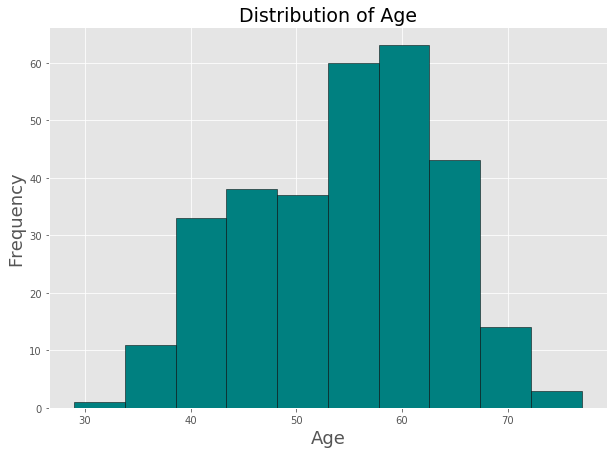

In [33]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.age.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Age', size=19)
plt.xlabel('Age', size=18)
plt.ylabel('Frequency', size=18)

##### Sex 

Text(0, 0.5, 'Frequency')

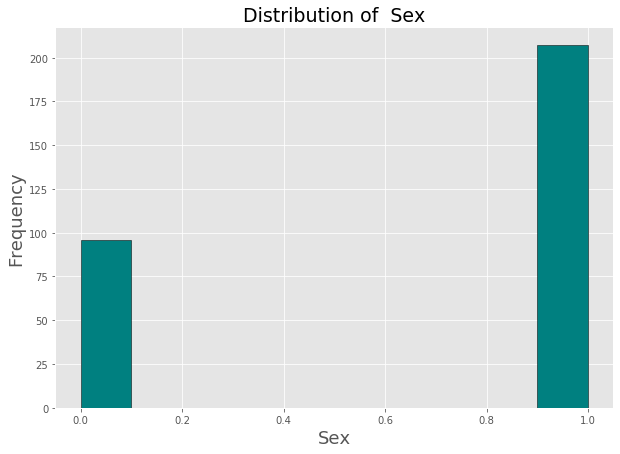

In [17]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.sex.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of  Sex', size=19)
plt.xlabel('Sex', size=18)
plt.ylabel('Frequency', size=18)

In [13]:
wo = len(df[df.sex == 0])
men = len(df[df.sex == 1])

In [15]:
print('Number of women: ', wo, '\n')
print('Number of men: ', men)

Number of women:  96 

Number of men:  207


##### CP 

Text(0, 0.5, 'Frequency')

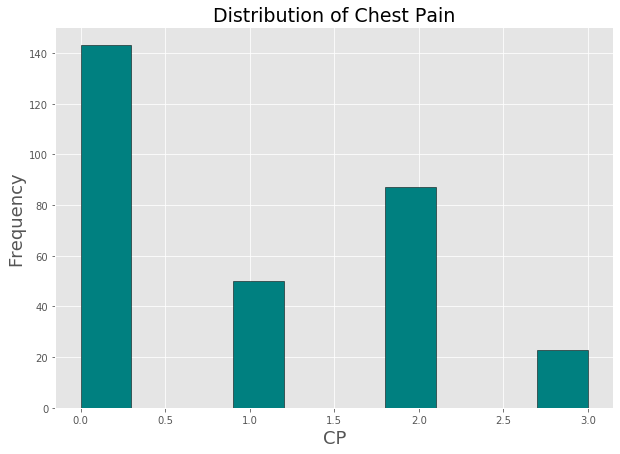

In [9]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.cp.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Chest Pain', size=19)
plt.xlabel('CP', size=18)
plt.ylabel('Frequency', size=18)

##### Trestbps 

Text(0, 0.5, 'Frequency')

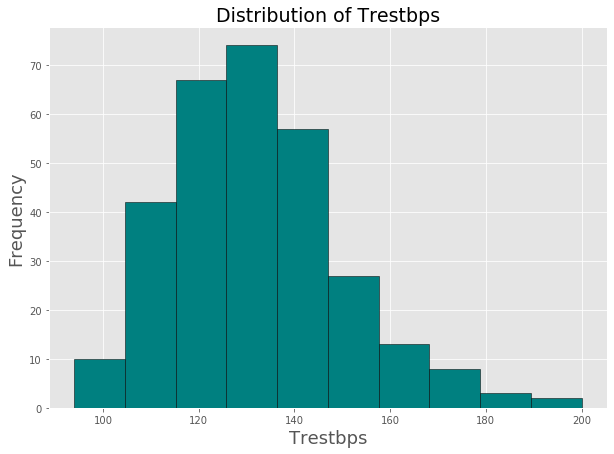

In [36]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.trestbps.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Trestbps', size=19)
plt.xlabel('Trestbps', size=18)
plt.ylabel('Frequency', size=18)

##### Chol

Text(0, 0.5, 'Frequency')

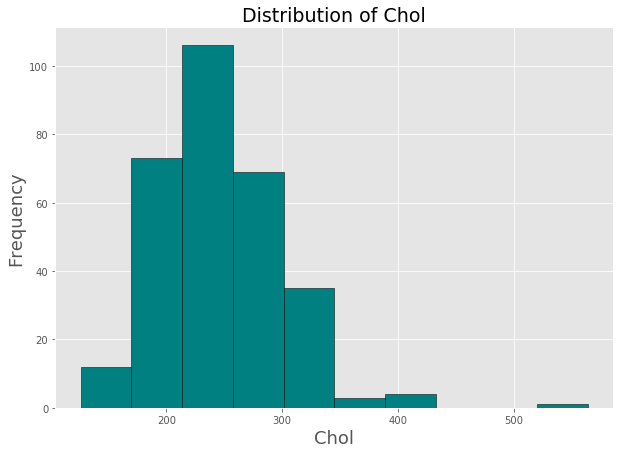

In [37]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.chol.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Chol', size=19)
plt.xlabel('Chol', size=18)
plt.ylabel('Frequency', size=18)

##### Fbs 

Text(0, 0.5, 'Frequency')

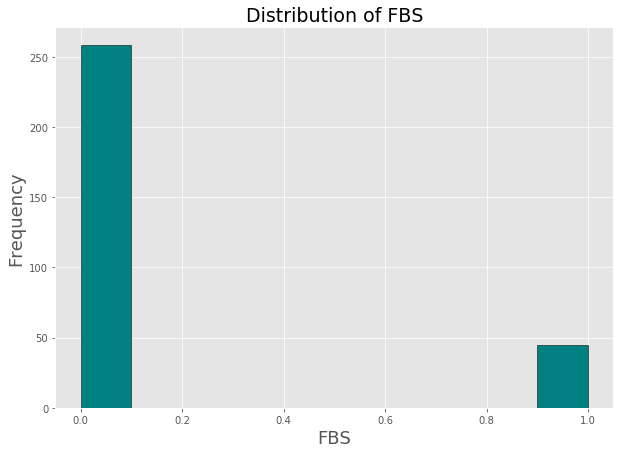

In [38]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.fbs.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of FBS', size=19)
plt.xlabel('FBS', size=18)
plt.ylabel('Frequency', size=18)

##### Restecg

Text(0, 0.5, 'Frequency')

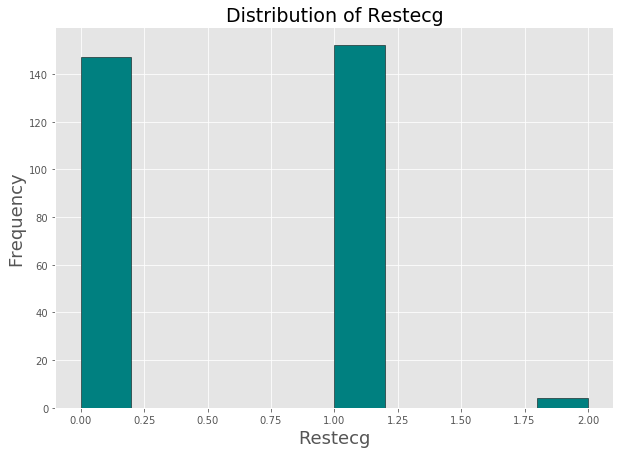

In [39]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.restecg.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Restecg', size=19)
plt.xlabel('Restecg', size=18)
plt.ylabel('Frequency', size=18)

##### Thalch

Text(0, 0.5, 'Frequency')

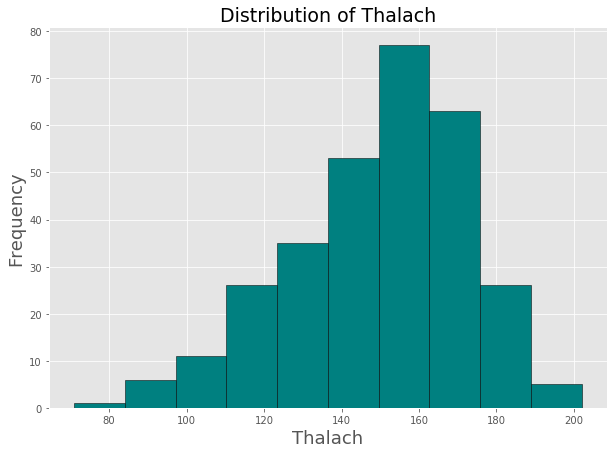

In [40]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.thalach.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Thalach', size=19)
plt.xlabel('Thalach', size=18)
plt.ylabel('Frequency', size=18)

##### Exang

Text(0, 0.5, 'Frequency')

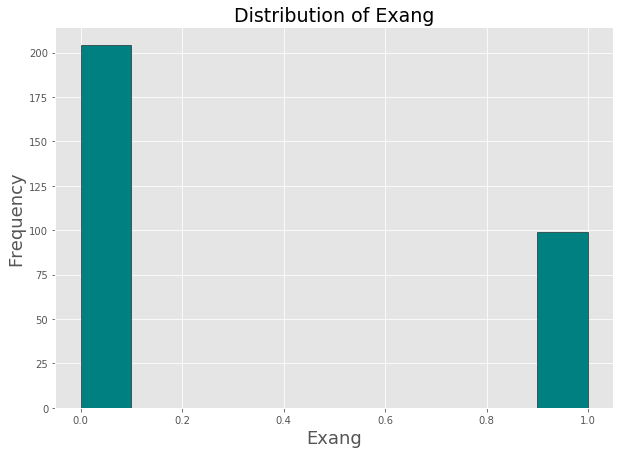

In [41]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.exang.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Exang', size=19)
plt.xlabel('Exang', size=18)
plt.ylabel('Frequency', size=18)

##### Old Peak

Text(0, 0.5, 'Frequency')

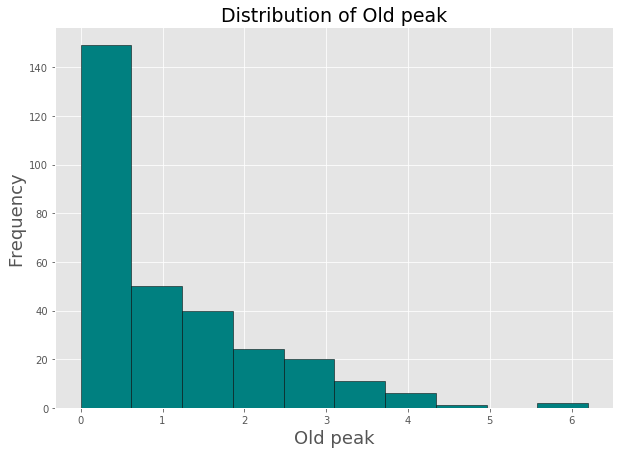

In [42]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.oldpeak.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Old peak', size=19)
plt.xlabel('Old peak', size=18)
plt.ylabel('Frequency', size=18)

##### Slope

Text(0, 0.5, 'Frequency')

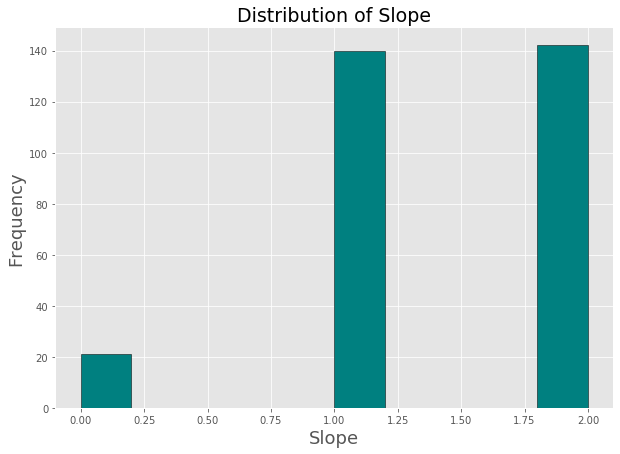

In [43]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.slope.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Slope', size=19)
plt.xlabel('Slope', size=18)
plt.ylabel('Frequency', size=18)

##### CA 

Text(0, 0.5, 'Frequency')

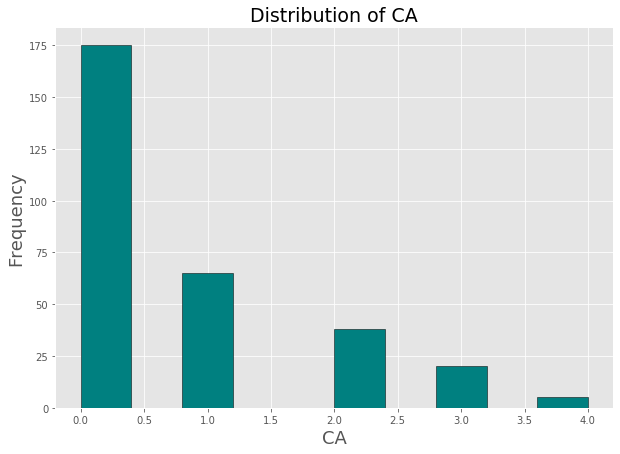

In [44]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.ca.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of CA', size=19)
plt.xlabel('CA', size=18)
plt.ylabel('Frequency', size=18)

##### Thal 

Text(0, 0.5, 'Frequency')

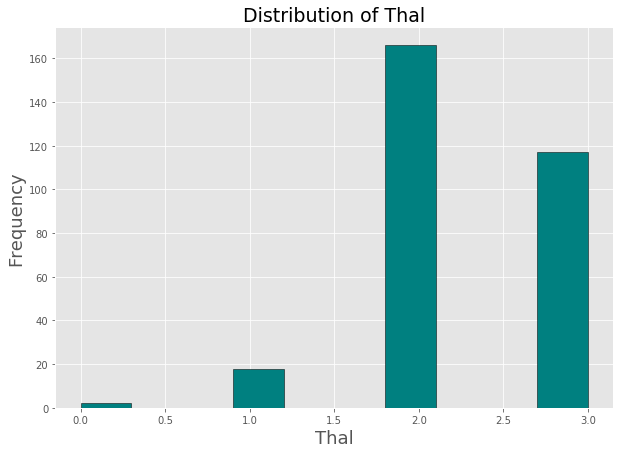

In [45]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.thal.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Thal', size=19)
plt.xlabel('Thal', size=18)
plt.ylabel('Frequency', size=18)

##### Target 

Text(0, 0.5, 'Frequency')

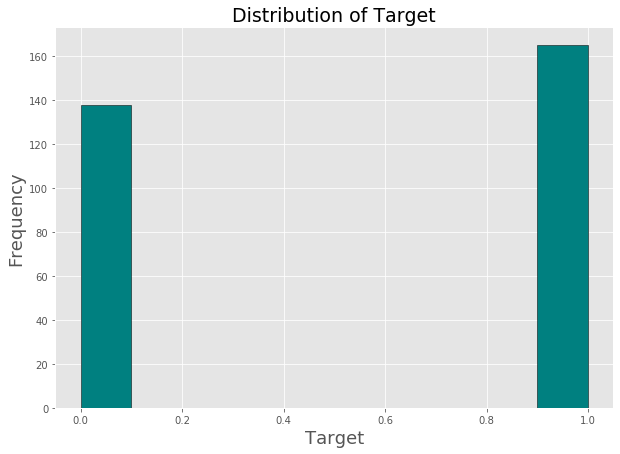

In [46]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.target.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Target', size=19)
plt.xlabel('Target', size=18)
plt.ylabel('Frequency', size=18)

In [11]:
NoD = len(df[df.target == 0])
HaveD = len(df[df.target == 1])

In [12]:
print('Persons that have no disease: ', NoD, '\n')
print('Persons that have disease: ', HaveD)

Persons that have no disease:  138 

Persons that have disease:  165


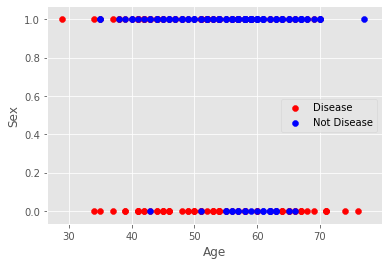

In [19]:
plt.scatter(x=df.age[df.target==1], y=df.sex[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.sex[(df.target==0)], c="blue")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Sex")
plt.show()

### Logistic Regression functions 

#### Cost Function

In [ ]:
def cost(x, y, theta):
    '''
    Calculates the cost for given X and Y. 

    theta:
        Vector.
    x:
        Row vector 
    y: 
        Vector

    pred: 
        # h(theta), Nos da todas las hipotesis
    '''

    m = len(y)

    # Sigmoide
    
    h = 1 / (1 + np.e**(-(np.dot(x, theta))))

    predp1 = (y * (np.log(h)))
    predp2 = (1 - y) * np.log(1 - h)

    f_cost = (- 1 / m) * np.sum((predp1 + predp2))

    return f_cost

#### Logistic Regression Function

In [ ]:
def logistic_r(x, y, theta, alpha, max_it):
    '''
    Returns the final theta vector.

    alpha: 
        Learning rate
    X:
        Matrix of X with added bias.
        dim :
            m,2
    Y: 
        Vector of Y

    theta:
        dim: 
            m,1 
    '''

    m = len(y)

    cost_history = np.zeros(max_it)
    #alm_theta = np.zeros((max_it, 2))

    for i in range(max_it):

        h = 1 / (1 + np.e**(-(np.dot(x, theta))))
        h_prim = h * (1 - h)

        theta = ((1 / m) * (x.T.dot((h - y))))

        #alm_theta[i, :] = theta.T
        #cost_history[i] = cost(x, y, theta)

    return theta

#### Data Input

##### X's and Y's

In [ ]:
kX = df.drop(['target'], axis = 1)
Y = df.target.values

#### Algorithm Input

In [ ]:
alpha = 0.01
max_it = 1000

X_vStack = np.c_[np.ones((len(X), 1)), X]

f, c = X_vStack.shape

theta = np.random.rand(c, 1)

gd = logistic_r(X_vStack, Y, theta, alpha, max_it)

print('Theta: \n', gd)

#### Plot

In [ ]:
plt.scatter(X, Y)
y = gd[1] * X + gd[0]
plt.plot(X, y, '-r')
plt.xlabel("$X$", fontsize=12)
plt.ylabel("$Y$", fontsize=12)
#plt.axhline(0, color='black')
#plt.axvline(0, color='black')
plt.show()